# Principal Component Analysis

PCA is an unsupervised learning algorithm which is widely used to reduce the dimensions of large datasets. It can also be used for feature extraction such that we can use a limited number of features. PCA helps to identify feature(s) that contributes maximally to the variance in the data.

PCA transforms the original data to a lower dimensional space while minimizing the information loss. 

Here we'll use a dataset from [this manuscript](https://www.pnas.org/doi/pdf/10.1073/pnas.1904964116) to receate some of the analysis presented in the manuscript. This manuscript presents analysis of 8 phenotypic traits in 169 *japonica* rice varieties. The data used here is available in the supplementary material of the manuscript [download](https://www.pnas.org/doi/suppl/10.1073/pnas.1904964116/suppl_file/pnas.1904964116.sd01.xlsx). Save this excel file in csv format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Read data in csv format having parameters for different aspect of the plant over two years. Columns 3 to 10 and 11 to 18 for 2014 and 2015, respectively. The first column is "Line number" so we'll use that as index for our dataframe and second column is plant variety. There is no header row in the csv file. Let's read the data and preprocess it.

In [2]:
df1 = pd.read_csv("pnas_suppl.csv", index_col=0,header=None)

In [3]:
df1

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,,,,,,,,,,,,,,,,,
Line 1,GORIKI,98,112.0,7.0,26.7,19.6,12.7,41.3,206.3,101,117.1,8.3,25.4,21.0,13.7,46.7,221.7
Line 2,HINOMARU,87,95.7,9.0,23.4,18.6,12.7,39.0,199.0,87,99.8,7.7,23.6,17.3,12.0,41.8,213.0
Line 3,MANGOKU,93,109.7,9.0,24.6,20.7,16.7,36.0,210.0,91,106.0,10.7,23.6,18.3,14.7,32.0,177.7
Line 4,KAIRYO SHINKOU,89,82.6,9.0,22.8,16.1,9.7,26.3,139.7,87,86.3,7.3,25.3,19.6,12.7,35.7,182.0
Line 5,SENICHI,98,103.1,11.0,23.1,17.1,10.3,24.3,136.0,98,102.0,14.0,26.0,20.0,11.7,26.7,140.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Line 165,HIMENOMOCHI,87,74.8,7.0,20.0,13.7,10.3,25.7,137.3,81,82.8,10.3,21.5,15.8,13.7,30.0,165.7
Line 166,SHINSHUU,92,91.3,16.0,20.1,13.4,11.7,9.7,93.0,91,85.8,11.3,20.3,14.5,10.3,16.0,102.0
Line 167,AICHI ASAHI_2***,113,84.3,12.0,23.4,16.7,9.0,23.0,123.7,107,88.3,10.7,24.8,18.6,10.0,25.7,141.0


## Data pre-processing

Next, we'll extract the data for the two years separately and merge them vertically in one dataframe. This reformating would be useful for subsequent analysis. We'll also add column header to our dataframe. These headers would be the name of different parameters. 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_2015 = df1[[1,10,11,12,13,14,15,16,17]]
df_2015.columns=["Variety","Days-to-heading", "Culm length (cm)","Panicle No.", "Panicle length (cm)", "Rachis length (cm)", "Primary branch No.", "Sec. branch No.", "Spikelet No."]
df_2015["Year"]=2015
df_2015.head()

,Variety,Days-to-heading,Culm length (cm),Panicle No.,Panicle length (cm),Rachis length (cm),Primary branch No.,Sec. branch No.,Spikelet No.,Year
0,,,,,,,,,,
Line 1,GORIKI,101,117.1,8.3,25.4,21.0,13.7,46.7,221.7,2015
Line 2,HINOMARU,87,99.8,7.7,23.6,17.3,12.0,41.8,213.0,2015
Line 3,MANGOKU,91,106.0,10.7,23.6,18.3,14.7,32.0,177.7,2015
Line 4,KAIRYO SHINKOU,87,86.3,7.3,25.3,19.6,12.7,35.7,182.0,2015
Line 5,SENICHI,98,102.0,14.0,26.0,20.0,11.7,26.7,140.3,2015


Remove that columns from df1 that have been copied to df2 and add headers (same as that in df2) to df1. Also, add the year column to df1 such that df1 would now have data for only 2014.

In [6]:
df_2014 = df1.drop(columns=[10,11,12,13,14,15,16,17])
df_2014.columns=["Variety","Days-to-heading", "Culm length (cm)","Panicle No.", "Panicle length (cm)", "Rachis length (cm)", "Primary branch No.", "Sec. branch No.", "Spikelet No."]
df_2014["Year"]=2014
df_2014.head()

,Variety,Days-to-heading,Culm length (cm),Panicle No.,Panicle length (cm),Rachis length (cm),Primary branch No.,Sec. branch No.,Spikelet No.,Year
0,,,,,,,,,,
Line 1,GORIKI,98,112.0,7.0,26.7,19.6,12.7,41.3,206.3,2014
Line 2,HINOMARU,87,95.7,9.0,23.4,18.6,12.7,39.0,199.0,2014
Line 3,MANGOKU,93,109.7,9.0,24.6,20.7,16.7,36.0,210.0,2014
Line 4,KAIRYO SHINKOU,89,82.6,9.0,22.8,16.1,9.7,26.3,139.7,2014
Line 5,SENICHI,98,103.1,11.0,23.1,17.1,10.3,24.3,136.0,2014


Now we have two dataframes having plant parameters for the two years i.e. df1 and df2 corresponding to 2014 and 2015, respectively. Let's combine these two dataframes vertically to get the full data as one dataframe.

In [8]:
df_final = pd.concat([df_2014,df_2015])
df_final

,Variety,Days-to-heading,Culm length (cm),Panicle No.,Panicle length (cm),Rachis length (cm),Primary branch No.,Sec. branch No.,Spikelet No.,Year
0,,,,,,,,,,
Line 1,GORIKI,98,112.0,7.0,26.7,19.6,12.7,41.3,206.3,2014
Line 2,HINOMARU,87,95.7,9.0,23.4,18.6,12.7,39.0,199.0,2014
Line 3,MANGOKU,93,109.7,9.0,24.6,20.7,16.7,36.0,210.0,2014
Line 4,KAIRYO SHINKOU,89,82.6,9.0,22.8,16.1,9.7,26.3,139.7,2014
Line 5,SENICHI,98,103.1,11.0,23.1,17.1,10.3,24.3,136.0,2014
...,...,...,...,...,...,...,...,...,...,...
Line 165,HIMENOMOCHI,81,82.8,10.3,21.5,15.8,13.7,30.0,165.7,2015
Line 166,SHINSHUU,91,85.8,11.3,20.3,14.5,10.3,16.0,102.0,2015
Line 167,AICHI ASAHI_2***,107,88.3,10.7,24.8,18.6,10.0,25.7,141.0,2015


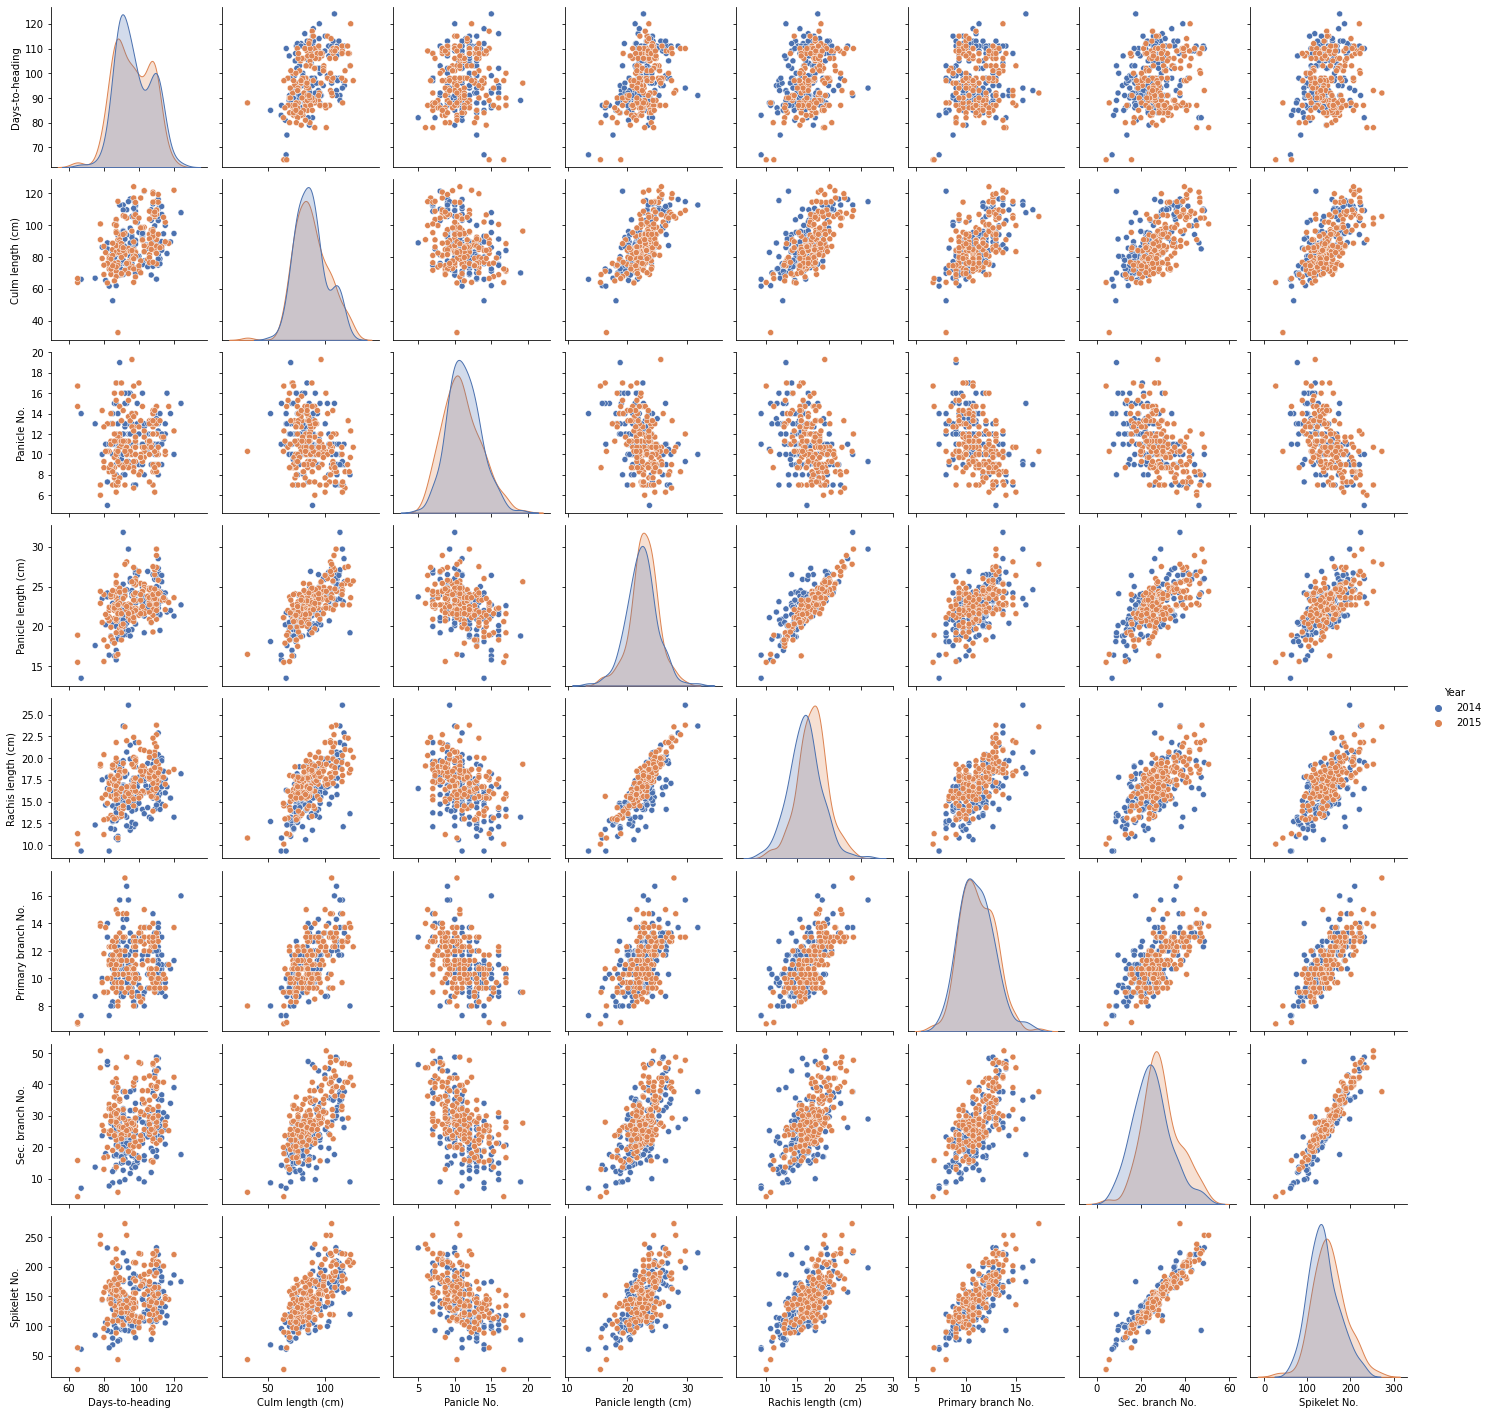

In [9]:
df_temp = df_final.reset_index(drop=True)
sns.pairplot(data=df_temp.iloc[:,range(1,10)], hue="Year", palette="deep")

## Model building

Perform the PCA using the normalized feature vectors to generate five components. We'll first create an object of the PCA class with five as the value for n_components argument. Subsequently we'll use the normalized matrix to generate principle components and save the results to a dataframe. We'll first do PCA of the 2015 data only.

In [9]:
# Exclude the Variety column
df_2015.iloc[:,[1,2,3,4,5,6,7,8]]

,Days-to-heading,Culm length (cm),Panicle No.,Panicle length (cm),Rachis length (cm),Primary branch No.,Sec. branch No.,Spikelet No.
0,,,,,,,,
Line 1,101,117.1,8.3,25.4,21.0,13.7,46.7,221.7
Line 2,87,99.8,7.7,23.6,17.3,12.0,41.8,213.0
Line 3,91,106.0,10.7,23.6,18.3,14.7,32.0,177.7
Line 4,87,86.3,7.3,25.3,19.6,12.7,35.7,182.0
Line 5,98,102.0,14.0,26.0,20.0,11.7,26.7,140.3
...,...,...,...,...,...,...,...,...
Line 165,81,82.8,10.3,21.5,15.8,13.7,30.0,165.7
Line 166,91,85.8,11.3,20.3,14.5,10.3,16.0,102.0
Line 167,107,88.3,10.7,24.8,18.6,10.0,25.7,141.0


**Normalization**

In [10]:
pca_2015_standard = StandardScaler().fit_transform(df_2015.iloc[:,[1,2,3,4,5,6,7,8]])

**Fit the data and create a dataframe of principle components**

In [11]:
pca_2015_model = PCA(n_components=5) #number of principal components
pca_2015_fit = pca_2015_model.fit_transform(pca_2015_standard) 

df_2015_pca = pd.DataFrame(data = pca_2015_fit, columns = ['pc1', 'pc2','pc3','pc4','pc5'])

The variance in the data as explained by each of the component can be check by the `explained_variance_ratio_` of the pca object. The output is the variance associated with each of the principal components (five in this case). We can also calculate the total variance explained by the five components. As we see below the five components together account for 95.9% variance in the data. 

In [12]:
print(pca_2015_model.explained_variance_ratio_)
print(pca_2015_model.explained_variance_ratio_.cumsum())

[0.62283251 0.16410666 0.07756149 0.05617533 0.03833603]
[0.62283251 0.78693917 0.86450066 0.92067599 0.95901202]


In [13]:
pca_2015_model.components_

array([[-0.16505669, -0.36898558,  0.24285994, -0.3816588 , -0.408246  ,
        -0.3591661 , -0.40835848, -0.41175211],
       [-0.7266037 , -0.2441704 , -0.47751906, -0.21155821, -0.13636855,
         0.2424033 ,  0.15019558,  0.19932913],
       [-0.22625375,  0.20730652,  0.74838672, -0.30732605, -0.09178569,
         0.41958235,  0.14012806,  0.21723589],
       [-0.41965494, -0.32972906,  0.31061083,  0.53659936,  0.50113939,
         0.04226267, -0.23352974, -0.15260259],
       [ 0.30823769, -0.18116406, -0.18564851, -0.1950358 ,  0.12892964,
         0.73701089, -0.43027916, -0.23391603]])

In [14]:
df_2015_pca.head()

,pc1,pc2,pc3,pc4,pc5
0,-4.241790,0.275651,0.358924,-0.495200,-0.275406
1,-2.030945,1.637908,0.070001,-0.686920,-0.911864
2,-1.854638,0.671051,1.212392,0.068783,0.847572
3,-1.925394,1.483075,-0.648590,0.746669,0.069074
4,-0.947741,-1.384563,0.557716,1.403352,-0.043060


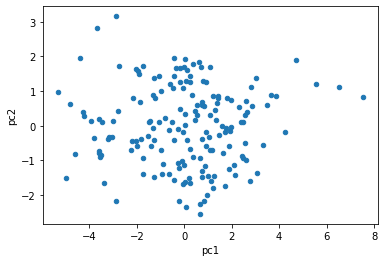

In [15]:
df_2015_pca.plot.scatter(x="pc1",y="pc2")
plt.show()

Let's plot the percentage variance explained vs the components. This plot would have to graphs with bars showing the vairance explained by each component and line showing the cumulative sum of the percent variance explained. 

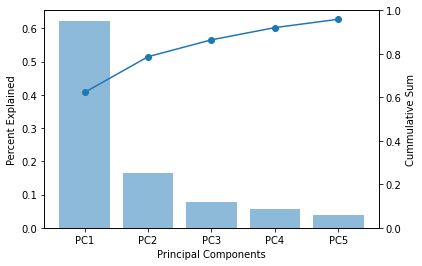

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(range(len(pca_2015_model.explained_variance_ratio_)), \
        pca_2015_model.explained_variance_ratio_, alpha=0.5)
ax2.plot(pca_2015_model.explained_variance_ratio_.cumsum())
ax2.scatter(range(len(pca_2015_model.explained_variance_ratio_)), \
            pca_2015_model.explained_variance_ratio_.cumsum())

ax2.set_ylim([0,1])

ax1.set_ylabel("Percent Explained")
ax2.set_ylabel("Cummulative Sum")
ax1.set_xlabel("Principal Components")
plt.xticks(ticks=range(len(pca_2015_model.explained_variance_ratio_)), \
           labels=["PC1", "PC2", "PC3", "PC4", "PC5"])
plt.show()

## PCA Loadings 

The loadings value range from -1 to 1 such that its value close to either end (1 or -1) is indicative of a strong influence of a particular feature to a specific component. Loadings can be thought of as analogous to correlation coefficient. To get the loadings we need to mutiple the eigenvectors with the square-root of egienvalues ([reference](https://stats.stackexchange.com/questions/143905/loadings-vs-eigenvectors-in-pca-when-to-use-one-or-another)). 

In [17]:
pca_2015_model.explained_variance_

array([5.01231878, 1.3206679 , 0.62418533, 0.45207762, 0.30851375])

In [18]:
loadings2 = pca_2015_model.components_.T * np.sqrt(pca_2015_model.explained_variance_)
loading_matrix = pd.DataFrame(loadings2, columns=['pc1', 'pc2','pc3','pc4','pc5'], index=df_2015.columns.values[1:-1])
loading_matrix

,pc1,pc2,pc3,pc4,pc5
Days-to-heading,-0.369532,-0.835015,-0.178753,-0.282162,0.171208
Culm length (cm),-0.826093,-0.280601,0.163783,-0.221699,-0.100626
Panicle No.,0.543720,-0.548766,0.591266,0.208845,-0.103117
Panicle length (cm),-0.854466,-0.243123,-0.242804,0.360792,-0.108331
Rachis length (cm),-0.913990,-0.156715,-0.072516,0.336950,0.071613
Primary branch No.,-0.804109,0.278571,0.331493,0.028416,0.409365
Sec. branch No.,-0.914241,0.172605,0.110709,-0.157018,-0.238994
Spikelet No.,-0.921839,0.229070,0.171628,-0.102605,-0.129926


The signs for the loadings are arbitary. The absolute number represents the correlation with the corresponding pincipal component. The opposite signs for the components indicate negative correlation within the components. 


## Biplot

Biplot is a useful visualization methods for PCA as gives information about relationship of different features with principal components. This plot comprises of two plots (hence the name):
1. A scatter plot showing transformed data along the first two principle components
2. PCA loadings as arrows

Visual analysis of this plot can give information about the extent to which different features affect a specific principal components. 

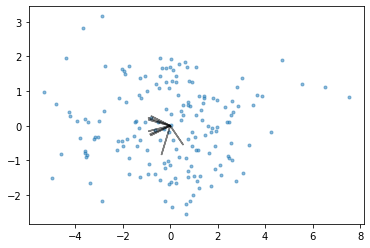

In [19]:
coeff = loading_matrix.values
plt.scatter(pca_2015_fit[:,0], pca_2015_fit[:,1], marker='.', alpha=0.5)
for i in range(8):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', \
              alpha=0.5, linestyle = '-',linewidth = 1.5, overhang=0.2)

Customising the biplot to match the figure given in the manuscript. The circle in the graph represents 100% variance explained.

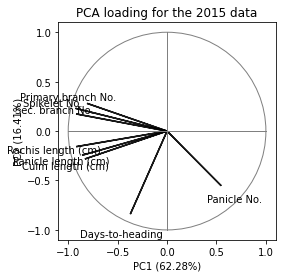

In [20]:
#coeff = np.transpose(pca_2015.components_[0:2, :])
coeff = loading_matrix.values
for i in range(8):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9, \
                  linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]*1.25, coeff[i,1]*1.25, \
                 df_2015.columns.values[1:-1][i], color = 'k', ha = 'center', \
                 va = 'center',fontsize=10)
circle1 = plt.Circle((0, 0), 1, color='grey',fill=False)
plt.gca().add_patch(circle1)
plt.plot([0, 0], [-1, 1], color='grey', linestyle='-', linewidth=1)
plt.plot([-1, 1], [0, 0], color='grey', linestyle='-', linewidth=1)

plt.gca().set_box_aspect(1)

plt.xlabel(f"PC1 ({pca_2015_model.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca_2015_model.explained_variance_ratio_[1]*100:.2f}%)")

plt.yticks(ticks=[-1,-0.5,0,0.5,1])
plt.title("PCA loading for the 2015 data")

plt.show()

Compare the above graph with Figure 1B of [this manuscript](https://www.pnas.org/doi/pdf/10.1073/pnas.1904964116). For a discussion on the results see the [supplementary material](https://www.pnas.org/doi/full/10.1073/pnas.1904964116).

### Exercise 

Create a figure showing PCA loadings for the 2014 data.